In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as sk_mse
from skimage.metrics import structural_similarity as sk_ssim

from tqdm import tqdm
from utils.utils import *

color_list = plt.cm.Pastel1(np.arange(9))

In [2]:
def plot_heatmap(y, x=None, title='temp', figures_dir='figures', filename='temp.png', show=False, save=False):
    # 热图
    m, n = y.shape

    plt.figure(figsize=(6, 6), dpi=100)
    plt.imshow(y, cmap='Reds', origin='lower', vmin=-0.1, vmax=1.1)
    if (x is None):
        plt.xticks(np.arange(m), np.arange(m), fontsize=10)
        plt.yticks(np.arange(n), np.arange(m), fontsize=10)
    else:
        plt.xticks(np.arange(m), x, fontsize=10)
        plt.yticks(np.arange(n), x, fontsize=10)

    # 每个方格上标记数值
    for i in range(m):
        for j in range(n):
            plt.text(j, i, '{:.3f}'.format(y[i, j]), 
                     ha="center", va="center", color="black", fontsize=10)

    plt.title(title)

    if (save==True):
        plt.savefig(figures_dir + filename)
    if (show==True):
        plt.show()
    plt.close()

In [3]:
'''count_list = []
threshold_list = [0.005, 0.01, 0.02, 0.05, 0.1]
for threshold in threshold_list:
    count_list.append(np.sum(loss_list<threshold))
count_list = np.array(count_list)'''

'count_list = []\nthreshold_list = [0.005, 0.01, 0.02, 0.05, 0.1]\nfor threshold in threshold_list:\n    count_list.append(np.sum(loss_list<threshold))\ncount_list = np.array(count_list)'

In [4]:
Ys_list = generate_Ys_list(dim=3, no_repeat=False)

mse_lists = []
ssim_lists = []

for nB in [2,3,4,5,6]:
    filename = f'results/{nB}_Ys_pred_list.npy'
    Ys_pred_list = np.load(filename)
    mse_list = []
    ssim_list = []
    for i in range(len(Ys_list)):
        mse_list.append(sk_mse(Ys_list[i], Ys_pred_list[i]))
        ssim_list.append(sk_ssim(Ys_list[i].astype(np.float32), Ys_pred_list[i]))
    mse_lists.append(mse_list)
    ssim_lists.append(ssim_list)



for nB in [2,3,4,5,6]:
    filename = f'results/MLP_{nB}_Ys_pred_list.npy'
    Ys_pred_list = np.load(filename)
    mse_list = []
    ssim_list = []
    for i in range(len(Ys_list)):
        mse_list.append(sk_mse(Ys_list[i], Ys_pred_list[i]))
        ssim_list.append(sk_ssim(Ys_list[i].astype(np.float32), Ys_pred_list[i]))
    mse_lists.append(mse_list)
    ssim_lists.append(ssim_list)

mse_lists = np.array(mse_lists)
ssim_lists = np.array(ssim_lists)

In [5]:
'''x = [2,3,4,5]
threshold_list = [0.005, 0.01, 0.02, 0.05, 0.1]

plt.figure(figsize=(8, 6))

plt.plot(x, data2[:, 0], label='mse<0.005', color=color_list[0])
plt.plot(x, data2[:, 1], label='mse<0.01', color=color_list[1])
plt.plot(x, data2[:, 2], label='mse<0.02', color=color_list[2])
plt.plot(x, data2[:, 3], label='mse<0.05', color=color_list[3])
plt.plot(x, data2[:, 4], label='mse<0.1', color=color_list[4])
plt.xticks([2,3,4,5])

plt.xlabel('receptor numbers')
plt.ylabel('ratio in 512 patterns')
plt.title('mse<threshold ratio')
plt.legend()

plt.show()'''

"x = [2,3,4,5]\nthreshold_list = [0.005, 0.01, 0.02, 0.05, 0.1]\n\nplt.figure(figsize=(8, 6))\n\nplt.plot(x, data2[:, 0], label='mse<0.005', color=color_list[0])\nplt.plot(x, data2[:, 1], label='mse<0.01', color=color_list[1])\nplt.plot(x, data2[:, 2], label='mse<0.02', color=color_list[2])\nplt.plot(x, data2[:, 3], label='mse<0.05', color=color_list[3])\nplt.plot(x, data2[:, 4], label='mse<0.1', color=color_list[4])\nplt.xticks([2,3,4,5])\n\nplt.xlabel('receptor numbers')\nplt.ylabel('ratio in 512 patterns')\nplt.title('mse<threshold ratio')\nplt.legend()\n\nplt.show()"

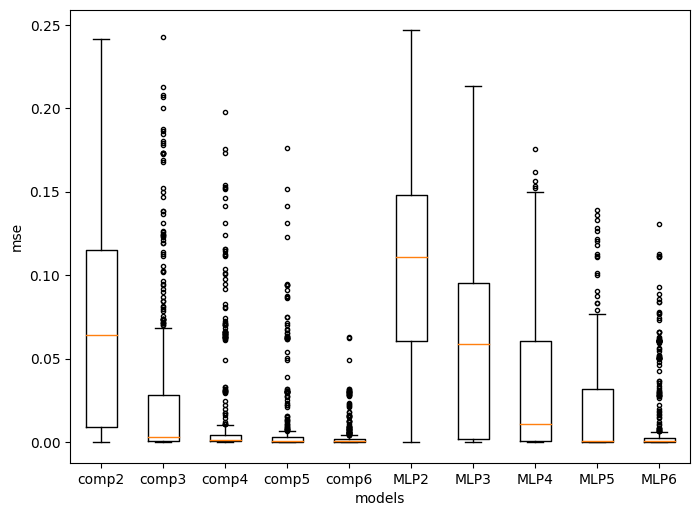

In [6]:
# rectangular box plot
plt.figure(figsize=(8, 6), dpi=100)
plt.boxplot(mse_lists.T, sym='.', labels=['comp2', 'comp3', 'comp4', 'comp5', 'comp6', 'MLP2', 'MLP3', 'MLP4', 'MLP5', 'MLP6'])
plt.xlabel('models')
plt.ylabel('mse')
plt.savefig('figures/mse_boxplot.png')
plt.show()

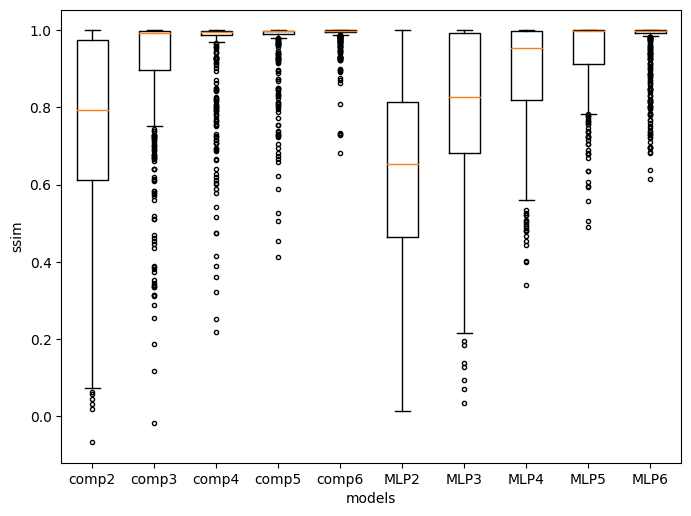

In [7]:
# rectangular box plot
plt.figure(figsize=(8, 6), dpi=100)
plt.boxplot(ssim_lists.T, sym='.', labels=['comp2', 'comp3', 'comp4', 'comp5', 'comp6', 'MLP2', 'MLP3', 'MLP4', 'MLP5', 'MLP6'])
plt.xlabel('models')
plt.ylabel('ssim')
plt.savefig('figures/ssim_boxplot.png')
plt.show()